## Answer Quality Metrics

In [14]:
#https://kaushikshakkari.medium.com/open-domain-question-answering-series-part-4-answer-quality-metrics-evaluating-the-reader-ff7fa20736bf
#https://www.kdnuggets.com/2020/04/simple-question-answering-systems-text-similarity-python.html
#https://medium.com/@sthanikamsanthosh1994/understanding-bleu-and-rouge-score-for-nlp-evaluation-1ab334ecadcb#:~:text=While%20BLEU%20score%20is%20primarily,the%20reference%20translations%20or%20summaries.
#https://medium.com/@mikeusru/common-metrics-for-evaluating-natural-language-processing-nlp-models-e84190063b5f
#https://towardsdatascience.com/comprehensive-guide-to-ranking-evaluation-metrics-7d10382c1025

### The Reader evaluation metrics can be divided into two categories:

### Lexical or Keyword-based Evaluation Metrics
### Neural Based Evaluation Metrics
### Ranking Based Evaluation Metrics

## Lexical or Keyword-based Evaluation Metrics

In [2]:
#1. Lexical or Keyword-based Evaluation Metrics:

#1.1 Exact Match (EM):
#Exact Match is a strict evaluation metric that only gives two scores (0 or 1).

#1.2 F1-Score:
#F1-Score is a looser metric than Exact Match; it considers the average overlap between the answer provided by the annotator and the predicted answer.
#Before calculating the score, we may need to perform some preprocessing on answers like converting words to lower cases, stemming or lemmatization, etc.


### F1= (2*precision*recall)/(precision+recall)
### precision = TP/(TP+FP)
### recall=TP/(TP+FN)
### True Positive (TP) is the number of words that overlap between the annotated label and the predicted answer.
### False Positive (FP) is the number of words present in the predicted answer but missing in the annotated label. 
### False Negative (FN) is the number of words present in the annotated label but missing in the predicted answer.

In [3]:
#Let's consider the below example,
#Annotated Answer / Gold Standard Label: Anthony Edward Stark
#Predicted Answer by model: Tony Stark
#Exact Match Score: 0
#F1-Score: 0.67 [TP = 1(Stark), FP = 1(Tony), FN = 2(Anthony, Edward) -> precision = 0.5, recall = 0.398]

In [4]:
# n-gram-based lexical matching algorithms
#BLEU and ROUGE scores are valuable tools for evaluating the performance of NLP models in machine translation and text summarization tasks

### While BLEU score is primarily used for machine translation tasks, ROUGE score is used for text summarization tasks. Both metrics rely on n-gram overlap to measure similarity between the machine-generated output and the reference translations or summaries.

In [15]:
#BLEU (Bilingual Evaluation Understudy) Score:
#BLEU score is a widely used metric for machine translation tasks, where the goal is to automatically translate text from one language to another. It was proposed as a way to assess the quality of machine-generated translations by comparing them to a set of reference translations provided by human translators.


### The formula for BLEU score is as follows:

### BLEU = BP * exp(∑ pn)

### Where:

### BP (Brevity Penalty) is a penalty term that adjusts the score for translations that are shorter than the reference translations. It is calculated as min(1, (reference_length / translated_length)), where reference_length is the total number of words in the reference translations, and translated_length is the total number of words in the machine-generated translation.
### pn is the precision of n-grams, which is calculated as the number of n-grams that appear in both the machine-generated translation and the reference translations divided by the total number of n-grams in the machine-generated translation.

In [28]:
from nltk.translate.bleu_score import sentence_bleu
reference = [['this', 'is', 'a', 'test'], ['this', 'is' 'test']]
candidate = ['this', 'is', 'a', 'test']
score = sentence_bleu(reference, candidate)
print(score)

1.0


In [31]:
#!pip install sacrebleu
import sacrebleu

# Example sentences
reference = ["The cat is on the mat"]
candidate = "The cat is on the mat"

# Calculate BLEU score
bleu = sacrebleu.raw_corpus_bleu([candidate], [reference])
print(f"BLEU Score: {bleu.score:.4f}")

BLEU Score: 100.0000


In [16]:
#ROUGE (Recall-Oriented Understudy for Gisting Evaluation) Score:
#ROUGE score is a set of metrics commonly used for text summarization tasks, where the goal is to automatically generate a concise summary of a longer text. ROUGE was designed to evaluate the quality of machine-generated summaries by comparing them to reference summaries provided by humans.

### ROUGE = ∑ (Recall of n-grams)

### Where:

### Recall of n-grams is the number of n-grams that appear in both the machine-generated summary and the reference summaries divided by the total number of n-grams in the reference summaries.

In [26]:
#!pip install rouge-score
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog','The quick brown dog jumps on the log.')
scores

{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765),
 'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471)}

# Mean Reciprocal Rank (MRR)

## Mean Reciprocal Rank (MRR) is a metric commonly used in information retrieval and ranking tasks, including those involving Large Language Models (LLMs). It measures the effectiveness of a model in returning relevant results at higher ranks in a list.

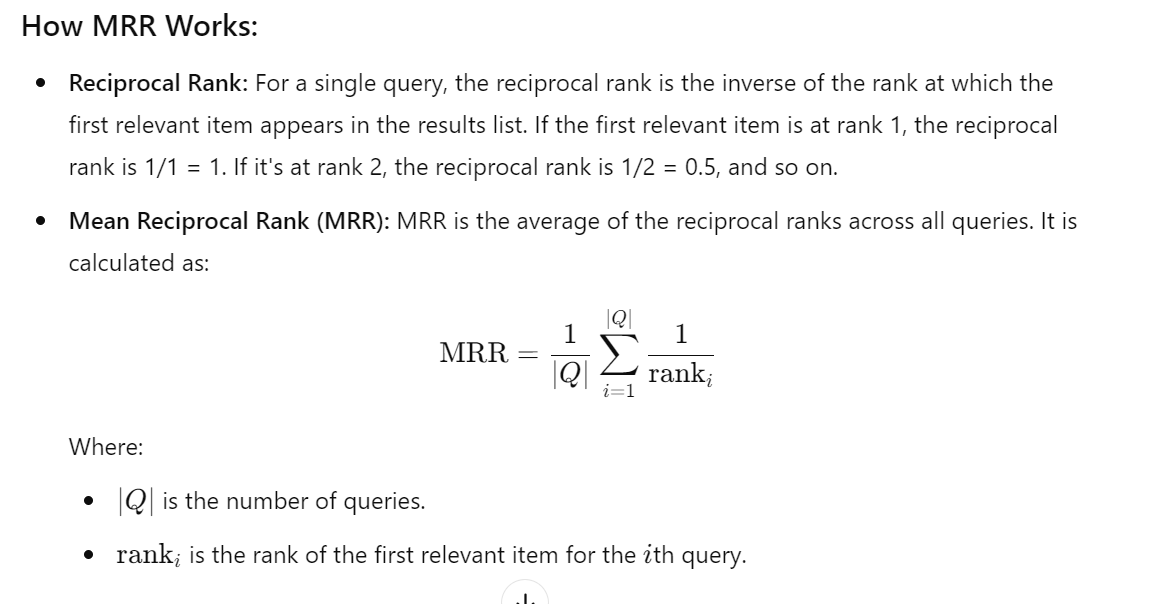

### Application in LLMs:
### In the context of LLMs, MRR can be used to evaluate how well the model ranks relevant responses or documents. For example, if an LLM is tasked with retrieving relevant passages in response to a query, MRR can help measure how often those relevant passages are ranked near the top.

## Neural Based Evaluation Metrics:

### While lexical metrics like EM and F1 scores are keyword-based and focus on keyword match, neural-based metrics focus on the semantics or meanings of answers

In [10]:
#2.1 BertScore:
#BertScore is based on the BERT language model. It computes the contextual embeddings for each word in answer labels and predicted answers. Later, an algorithm like cosine similarity is used to calculate the contextual similarity between each word in answer labels and each word in predicted answers. The highest cosine similarity between a token from label answer and a token from annotations is considered as BertScore.

#2.2 Bi-Encoder Score:
#Bi-Encoder Score is based on sentence transformers architecture. It uses two language models to separately calculate embeddings for predicted answers and answer labels. Later cosine similarity is used to calculate the score between contextual embeddings. Before calculating embeddings, two language models are trained on the multi-lingual paraphrase dataset and STS benchmark dataset. 

#2.3 Semantic Similarity:
#Semantic Similarity or Semantic Answer Similarity (SAS) uses the “cross-encoder/stsb-roberta-large” language model, which has been trained on the STS benchmark dataset. Unlike Bi-Encoder where two separate models are used, SAS uses a cross-encoder architecture where a predicted answer and a label are separated by a special token to calculate the score. Among all neural-based metrics, cross-encoder model metrics have relatively the strongest correlation with human judgment.

In [9]:
#Bi-Encoder Score

from sentence_transformers import CrossEncoder
model = CrossEncoder('T-Systems-onsite/cross-en-de-roberta-sentence-transformer', max_length=512)
scores = model.predict([['atleast 1000', 'four thousand']])
scores

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at T-Systems-onsite/cross-en-de-roberta-sentence-transformer and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


array([0.5192396], dtype=float32)

In [11]:
#Semantic Similarity or Semantic Answer Similarity (SAS)

from sentence_transformers.cross_encoder import CrossEncoder
model = CrossEncoder('cross-encoder/stsb-roberta-large')
scores = model.predict([["Thirty Bucks", "30 $"]])
print (scores)

[0.29968646]


In [12]:
#Example:1
#Annotated Answer / Gold Standard Label: I love you 3000
#Predicted Answer by model: likes and adores very much
#Exact Match Score: 0
#F1-Score: undefined or generally considered as 0 [TP = 0, FP = 5, FN = 4-> precision = 0, recall = 0]
#Bi-Encoder Score: 0.151
#Semantic Answer Similarity: 0.482

In [13]:
#Example: 2
#Annotated Answer / Gold Standard Label: Thirty Bucks
#Predicted Answer by model: 30 $
#Exact Match Score: 0
#F1-Score: undefined or generally considered as 0 [TP = 0, FP = 2, FN = 2-> precision = 0, recall = 0]
#Bi-Encoder Score: 0.869
#Semantic Answer Similarity: 0.493

# RAG Evaluation with RAGAS

In [ ]:
import os
import pandas as pd
from ragas import evaluate
from datasets import Dataset
from ragas.metrics import answer_similarity
from langchain_openai.chat_models import AzureChatOpenAI
from langchain_openai.embeddings import AzureOpenAIEmbeddings
from ragas.metrics import (
    context_precision, 
    answer_relevancy,
    faithfulness,
    context_recall,
    answer_correctness
)

# Set API key for Azure
os.environ["OPENAI_API_KEY"] = ""

# Azure configurations
azure_configs = {
    "base_url": "https://ai.com",
    "model_deployment": "gpt-4-32k-0613",
    "model_name": "gpt-4",
    "embedding_deployment": "text-embedding-ada-002",
    "embedding_name": "text-embedding-ada-002",
}

# Initialize Azure Chat model
azure_model = AzureChatOpenAI(
    openai_api_version="2023-10-01-preview",
    azure_endpoint=azure_configs["base_url"],
    azure_deployment=azure_configs["model_deployment"],
    model=azure_configs["model_name"],
    validate_base_url=False,
    api_key=os.environ.get("OPENAI_API_KEY"),
)

# Initialize Azure embeddings
azure_embeddings = AzureOpenAIEmbeddings(
    openai_api_version="2023-05-15",
    azure_endpoint=azure_configs["base_url"],
    azure_deployment=azure_configs["embedding_deployment"],
    model=azure_configs["embedding_name"],
)

# Sample data
data_samples = {
    'question': [
        'When was the first super bowl?', 
        'Who won the most super bowls?'
    ],
    'answer': [
        'The first superbowl was held on Jan 15, 1967', 
        'The most super bowls have been won by The New England Patriots'
    ],
    'contexts': [
        [
            'The First AFL–NFL World Championship Game was an American football game played on January 15, 1967, at the Los Angeles Memorial Coliseum in Los Angeles,'
        ], 
        [
            'The Green Bay Packers...Green Bay, Wisconsin.',
            'The Packers compete...Football Conference'
        ]
    ],
    'ground_truth': [
        'The first superbowl was held on January 15, 1967', 
        'The New England Patriots have won the Super Bowl a record six times'
    ]
}

# List of metrics
metrics = [
    answer_correctness,
    answer_similarity,
    faithfulness,
]

# Function to evaluate metrics for a single row
def evaluate_row(row):
    row_data = {
        'question': [row['question']],
        'answer': [row['answer']],
        'contexts': [row['contexts']],
        'ground_truth': [row['ground_truth']]
    }
    dataset = Dataset.from_dict(row_data)
    result = evaluate(dataset, metrics=metrics, llm=azure_model, embeddings=azure_embeddings)
    return result

# Create a DataFrame from the original data_samples
final_df = pd.DataFrame(data_samples)

# Initialize new columns for each metric
metric_names = ['answer_correctness', 'answer_similarity', 'faithfulness']
for metric_name in metric_names:
    final_df[metric_name] = 0.0

# Apply evaluate_row function to each row and update the DataFrame
for index, row in final_df.iterrows():
    result = evaluate_row(row)
    for metric_name in metric_names:
        final_df.at[index, metric_name] = result[metric_name]

# Save the DataFrame to a CSV file
#final_df.to_csv('evaluated_dataset.csv', index=False)

#print(final_df)

In [2]:
#Note
#bit.ly/AIMRAG
#tinyurl.com/EVALRAG

#https://www.canva.com/design/DAF13fk63Ps/oKNCJf_Oez21fkf0KRW9eA/edit

## RAG Metrics

In [ ]:
#https://docs.ragas.io/en/latest/concepts/metrics/index.html